In [26]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
normalized_columns = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

#initialize the standardscaler
scaler = StandardScaler()

#fit and transform selcted columns
df_market_data[normalized_columns] = scaler.fit_transform(df_market_data[normalized_columns])

#generate summer statistics after normalization to confirm
normalized_stats = df_market_data[normalized_columns].describe()
normalized_stats

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,-5.415722e-18,-1.083144e-17,2.707861e-17,6.769653e-18,-5.415722e-18,-8.123583e-18,8.123583e-18
std,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042e+00,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-1.274675e-01,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,7.749718e-02,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,3.312798e-01,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812e+00,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


In [13]:
# Create a DataFrame with the scaled data
scaled_data_df = df_market_data[normalized_columns].copy()

# Copy the crypto names from the original data
scaled_data_df["coin_id"] = df_market_data.index

# Set the coinid column as index
scaled_data_df.set_index("coin_id", inplace=True)

# Display sample data
scaled_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [15]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12)) # 12 is exclusive, so this includes values from 1-11


In [22]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=0)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(scaled_data_df)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)
    
os.environ["OMP_NUM_THREADS"] = "1"

C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is k

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    "k_values": k_values,
    "inertia_values": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)

#display
elbow_curve_df

,k_values,inertia_values
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


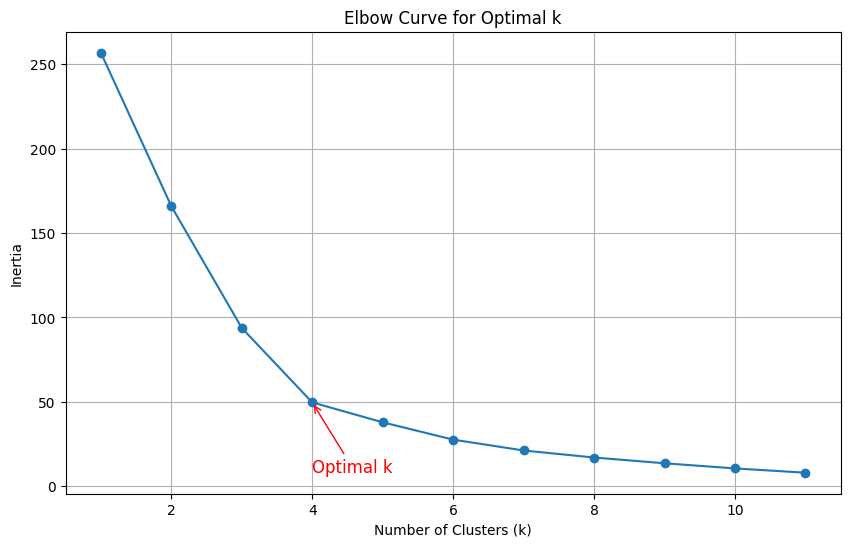

In [64]:
#define optimal_k
optimal_k = 4
# Plot a line chart with all the inertia values computed with 
plt.figure(figsize=(10,6))
plt.plot(elbow_curve_df['k_values'], elbow_curve_df['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# the different values of k to visually identify the optimal value for k.
plt.annotate('Optimal k', xy=(optimal_k, elbow_curve_df['inertia_values'][optimal_k - 1]), xytext=(optimal_k, inertia_values[-1]),
            arrowprops=dict(arrowstyle='->', lw=1, color='red'), fontsize=12, color='red')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** I would say based on the df and the graph the best value for k would be 4. 4 has the most curve to it which resembles a elbow. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [35]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

In [36]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data_df)

C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [38]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(scaled_data_df)

# Print the resulting array of cluster values.
cluster_labels

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [41]:
# Create a copy of the DataFrame
copied_df = scaled_data_df.copy()

In [42]:
# Add a new column to the DataFrame with the predicted clusters
copied_df['predicted_clusters'] = cluster_labels

# Display sample data
copied_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [65]:
# Create a scatter plot using hvPlot by setting 
scatter_plot = copied_df.hvplot.scatter(
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters", # Color the graph points with the labels
    colormap='Set1', #choose a color map for clusters
    hover_cols=["coin_id"], #add crypto name to identify
    legend=True, #show legend
    title="Cryptocurrency Clusters",
    width=800,
    height=500,
)

scatter_plot

# the cryptocurrency represented by each data point.


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [49]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [50]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_result = pca_model.fit_transform(scaled_data_df)

#create data frame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
pca_df.head(5)

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [53]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

#create a dataframe to show explained variance
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'], index=['PC1', 'PC2', 'PC3'])

#view
explained_variance_df

,Explained Variance
PC1,0.371986
PC2,0.347008
PC3,0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance equation would be 0.371986+0.347008+0.176038 ≈ 0.895032. which is 89.50%.

In [54]:
# Create a new DataFrame with the PCA data.
pca_data_df = pd.DataFrame({
    "PC1": pca_df["PC1"],
    "PC2": pca_df["PC2"],
    "PC3": pca_df["PC3"],
})

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
pca_data_df["coin_id"] = df_market_data.index

# Set the coinid column as index
pca_data_df.set_index("coin_id", inplace=True)

# Display sample data
pca_data_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [56]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [58]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
    #set the OMP_NUM_THREADS to 1
    os.environ["OMP_NUM_THREADS"] = "1"
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(pca_data_df)
    
# 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_model.inertia_)
    
#show
inertia_values

C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zombi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

[256.8740855678926,
 165.90199402036023,
 93.77462568057307,
 49.66549665179742,
 37.878747033462524,
 27.618971787957463,
 21.18277586295736,
 17.016962140077446,
 13.593650379876753,
 10.559357562793451,
 8.007418066730603]

In [72]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    "k_values": k_values,
    "inertia_values": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)
elbow_curve_df

,k_values,inertia_values
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.016962
8,9,13.593650
9,10,10.559358


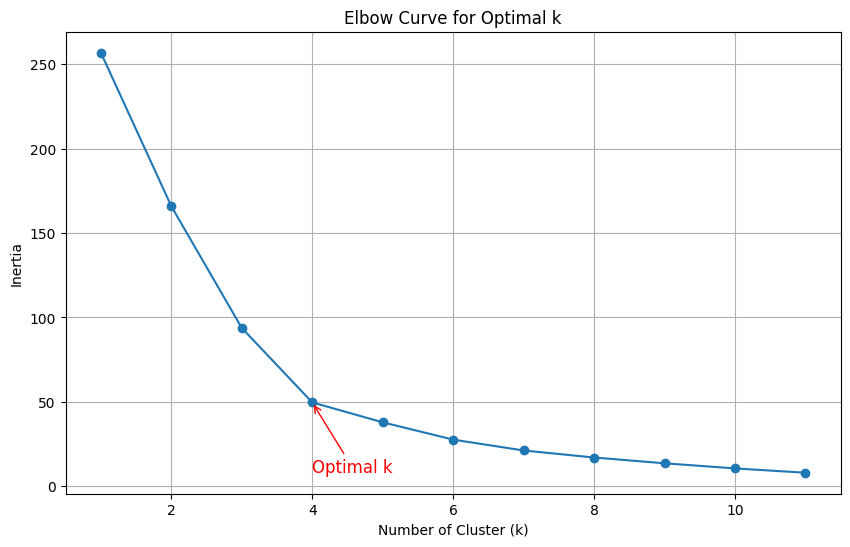

In [73]:
Optimal_k = '.'
# Plot a line chart with all the inertia values computed with 
plt.figure(figsize=(10, 6))
plt.plot(elbow_curve_df['k_values'], elbow_curve_df['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)

# the different values of k to visually identify the optimal value for k.
plt.annotate('Optimal k', xy=(optimal_k, elbow_curve_df['inertia_values'][optimal_k - 1]), xytext=(optimal_k, inertia_values[-1]),
            arrowprops=dict(arrowstyle='->', lw=1, color='red'), fontsize=12, color='red')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [74]:
# Initialize the K-Means model using the best value for k
optimal_k = 4

In [75]:
# Fit the K-Means model using the PCA data
kmeans_model_pca = LMeans()

NameError: name 'kmeans_model_pca' is not defined

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [28]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 